# 1. Kết nối tới drive , import một số thư viện cần thiết

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import neighbors
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [56]:
VNP = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/VNP.csv")

In [57]:
VNP

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,5100,5200,5200,4900,42.50K,-1.92%
1,12/4/2017,5800,5100,5800,5100,574.50K,13.73%
2,12/5/2017,5700,6000,6000,5600,218.50K,-1.72%
3,12/6/2017,5800,5800,5800,5700,176.41K,1.75%
4,12/7/2017,6300,5800,6400,5600,307.82K,8.62%
...,...,...,...,...,...,...,...
1225,6/5/2023,14700,15500,15500,14700,18.00K,-0.68%
1226,6/6/2023,14900,14600,14900,14600,1.80K,1.36%
1227,6/7/2023,14800,14800,15500,14600,10.02K,-0.67%
1228,6/8/2023,14400,14900,14900,14300,8.80K,-2.70%


In [58]:
VNP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1230 non-null   object
 1   Price     1230 non-null   int64 
 2   Open      1230 non-null   int64 
 3   High      1230 non-null   int64 
 4   Low       1230 non-null   int64 
 5   Vol.      1229 non-null   object
 6   Change %  1230 non-null   object
dtypes: int64(4), object(3)
memory usage: 67.4+ KB


# 2. Tiền xử lý dữ liệu

<h1>Loại bỏ một số dữ liệu trống trong dataset

In [59]:
VNP = VNP.reset_index(drop=True) # Reset the index

In [60]:
# Drop missing values
VNP = VNP.dropna()

In [61]:
VNP = VNP.reset_index()['Price'].astype(float)

In [62]:
# VNP['Index'] = np.arange(len(VNP.index))

In [63]:
VNP.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1229 entries, 0 to 1228
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1229 non-null   float64
dtypes: float64(1)
memory usage: 9.7 KB


# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [64]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VNP))
test_size = int(0.2 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [65]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

In [66]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [67]:
from math import sqrt

In [68]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9352.967443544321
RMSE value for k=  2 is: 9312.24177836763
RMSE value for k=  3 is: 9109.998991912846
RMSE value for k=  4 is: 8850.732271100165
RMSE value for k=  5 is: 8965.875897660246
RMSE value for k=  6 is: 9177.151764707372
RMSE value for k=  7 is: 9318.054201966588
RMSE value for k=  8 is: 9414.22352569965
RMSE value for k=  9 is: 9525.894110485504
RMSE value for k=  10 is: 9599.162378423804
RMSE value for k=  11 is: 9636.730678766096
RMSE value for k=  12 is: 9681.901904574117
RMSE value for k=  13 is: 9752.164898261002
RMSE value for k=  14 is: 9747.13854998155
RMSE value for k=  15 is: 9892.935751220552
RMSE value for k=  16 is: 10079.189132635054
RMSE value for k=  17 is: 10219.744463257734
RMSE value for k=  18 is: 10364.262735520284
RMSE value for k=  19 is: 10449.163476346735
RMSE value for k=  20 is: 10551.529630864921


<Axes: >

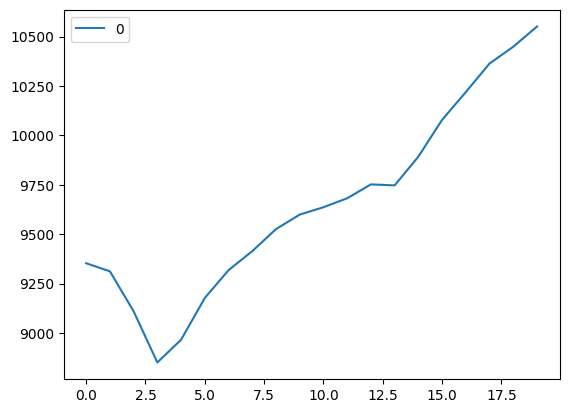

In [69]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [70]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 4)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [71]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [72]:
import sys

In [73]:
#  Create index for next 30 days
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775.
 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775.
 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775. 25775.]


<h1> Vẽ hình mô tả dự đoán

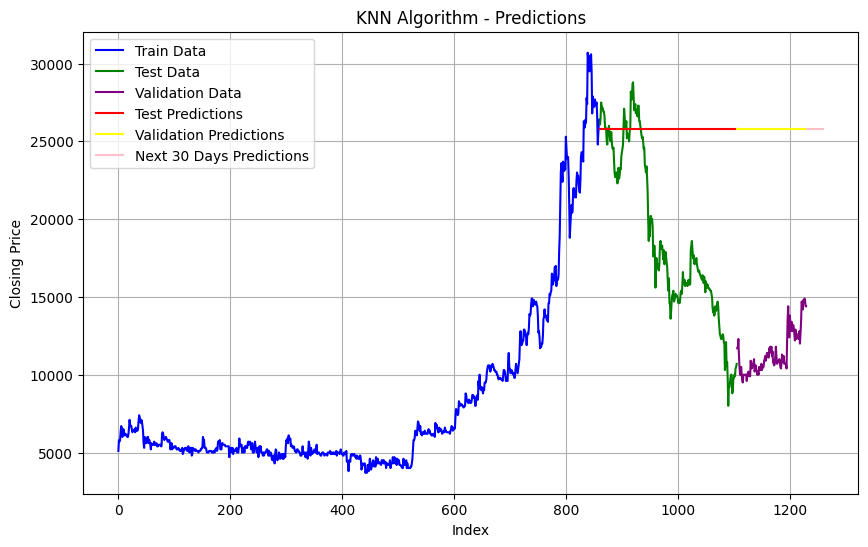

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [75]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 14426.755358059218
Testing RMSE: 8850.732271100165


In [76]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 14362.09677419355
Testing MAE: 7335.816326530612


In [77]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 128.80059572504115
Testing MAPE: 51.460458400237385


# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [78]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VNP))
test_size = int(0.3 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [79]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

In [80]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [81]:
from math import sqrt

In [82]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7727.184157246415
RMSE value for k=  2 is: 7762.339405326094
RMSE value for k=  3 is: 7750.602867310598
RMSE value for k=  4 is: 7904.559773788247
RMSE value for k=  5 is: 8056.53306329714
RMSE value for k=  6 is: 8146.989011388859
RMSE value for k=  7 is: 8233.341217798255
RMSE value for k=  8 is: 8354.845151168272
RMSE value for k=  9 is: 8408.241765635192
RMSE value for k=  10 is: 8443.560898825443
RMSE value for k=  11 is: 8451.833193128576
RMSE value for k=  12 is: 8452.407880209636
RMSE value for k=  13 is: 8452.894176407912
RMSE value for k=  14 is: 8491.306785603761
RMSE value for k=  15 is: 8524.700166146918
RMSE value for k=  16 is: 8563.565071810364
RMSE value for k=  17 is: 8602.47945620876
RMSE value for k=  18 is: 8620.065606797072
RMSE value for k=  19 is: 8615.567535537764
RMSE value for k=  20 is: 8634.60542639704


<Axes: >

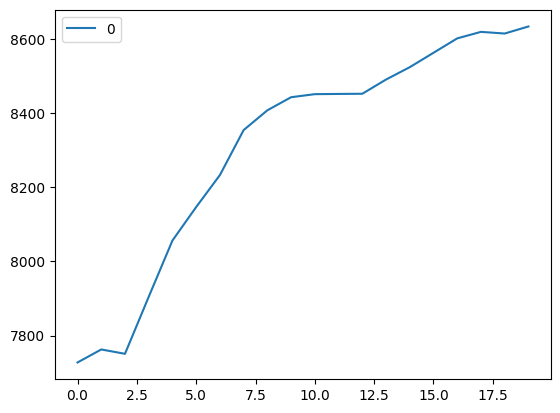

In [83]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [84]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [85]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [86]:
import sys

In [87]:
#  Create index for next 30 days
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900.
 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900.
 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900. 13900.]


<h1> Vẽ hình mô tả dự đoán

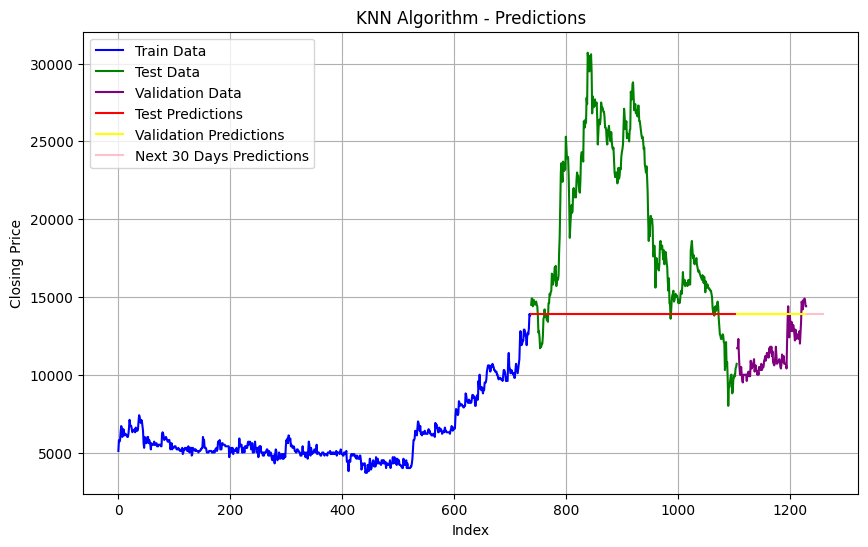

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [89]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 2836.7405193625923
Testing RMSE: 7727.184157246415


In [90]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 2596.7741935483873
Testing MAE: 6071.467391304348


In [91]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 24.136893652600193
Testing MAPE: 27.75605876527462


# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [92]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VNP))
test_size = int(0.3 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [93]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

In [94]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [95]:
from math import sqrt

In [96]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 11959.059463890526
RMSE value for k=  2 is: 11959.059463890526
RMSE value for k=  3 is: 11959.059463890526
RMSE value for k=  4 is: 11979.502988347476
RMSE value for k=  5 is: 11959.059463890526
RMSE value for k=  6 is: 11931.828426078377
RMSE value for k=  7 is: 12005.812862111232
RMSE value for k=  8 is: 12071.711114797705
RMSE value for k=  9 is: 12095.672984654093
RMSE value for k=  10 is: 12114.85891464441
RMSE value for k=  11 is: 12123.085908980507
RMSE value for k=  12 is: 12157.393664456227
RMSE value for k=  13 is: 12237.269568710934
RMSE value for k=  14 is: 12311.84718383409
RMSE value for k=  15 is: 12371.110499870252
RMSE value for k=  16 is: 12423.070885147172
RMSE value for k=  17 is: 12478.806213016971
RMSE value for k=  18 is: 12519.161708755199
RMSE value for k=  19 is: 12550.917538493004
RMSE value for k=  20 is: 12587.895626527406


<Axes: >

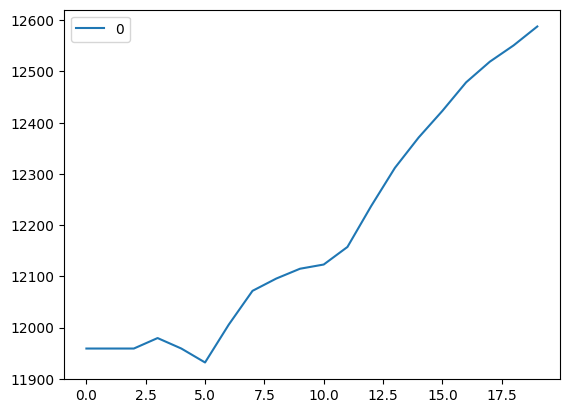

In [97]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [98]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [99]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [100]:
import sys

In [101]:
#  Create index for next 30 days
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333
 8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333
 8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333
 8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333
 8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333
 8133.33333333 8133.33333333 8133.33333333 8133.33333333 8133.33333333]


<h1> Vẽ hình mô tả dự đoán

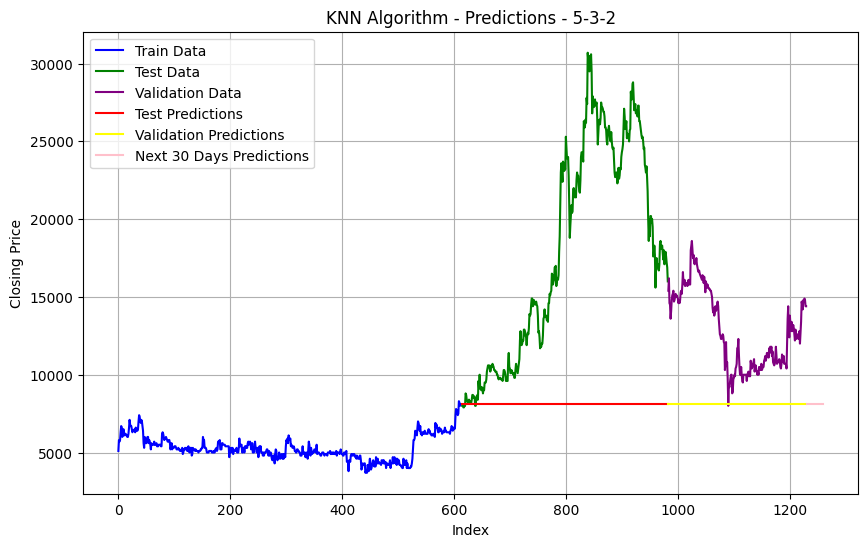

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions - 5-3-2')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [103]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 5359.243321482745
Testing RMSE: 11931.828426078377


In [104]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 4754.790823211877
Testing MAE: 9748.822463768114


In [105]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 34.5548701832814
Testing MAPE: 46.148712829009064
